<a href="https://colab.research.google.com/github/Deyonrose/ADA/blob/main/2348513_ADA_TextClassification_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA COLLECTION

In [ ]:
from  sklearn.datasets import fetch_20newsgroups
#load the training and test sets
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

#print information about dataset
print(f"Categories: {newsgroups_train.target_names}")
print(f"Number of Categories: {len(newsgroups_train.target_names)}")
print(f"Number of training documents: {len(newsgroups_train.data)}")
print(f"Number of test documents: {len(newsgroups_test.data)}")

Categories: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
Number of Categories: 20
Number of training documents: 11314
Number of test documents: 7532


In [ ]:
type(newsgroups_train)

sklearn.utils._bunch.Bunch

In [ ]:
# code for pre processing

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

#initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

#Preprocessing function
def preprocess(text):
  text = text.lower()
  text = ''.join([char for char in text if char not in string.punctuation])
  words = word_tokenize(text)
  words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
  return ' '.join(words)

#Pre processing the training and test data
newsgroups_train_preprocessed = [preprocess(text) for text in newsgroups_train.data]
newsgroups_test_preprocessed = [preprocess(text) for text in newsgroups_test.data]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(newsgroups_train_preprocessed)

['wondering anyone could enlighten car saw day 2door sport car looked late 60 early 70 called bricklin door really small addition front bumper separate rest body know anyone tellme model name engine spec year production car made history whatever info funky looking car please email', 'fair number brave soul upgraded si clock oscillator shared experience poll please send brief message detailing experience procedure top speed attained cpu rated speed add card adapter heat sink hour usage per day floppy disk functionality 800 14 floppy especially requested summarizing next two day please add network knowledge base done clock upgrade havent answered poll thanks', 'well folk mac plus finally gave ghost weekend starting life 512k way back 1985 sooo im market new machine bit sooner intended im looking picking powerbook 160 maybe 180 bunch question hopefully somebody answer anybody know dirt next round powerbook introduction expected id heard 185c supposed make appearence summer havent heard an

In [ ]:
#feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10000)
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

y_train= newsgroups_train.target
y_test = newsgroups_test.target

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Split the training data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Train a Naive Bayes classifier
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_nb = clf_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy on the test set (Multinomial NB): {accuracy_nb}")

# Train an SVC classifier
clf_svc = SVC()
clf_svc.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_svc = clf_svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"Accuracy on the test set (SVC): {accuracy_svc}")

# Train a Logistic Regression classifier
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_lr = clf_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy on the test set (Logistic Regression): {accuracy_lr}")

# Train a Random Forest Classifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_rf = clf_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy on the test set (Random Forest): {accuracy_rf}")



Accuracy on the test set (Multinomial NB): 0.6261285183218269
Accuracy on the test set (SVC): 0.6356877323420075
Accuracy on the test set (Logistic Regression): 0.6525491237387148
Accuracy on the test set (Random Forest): 0.5793945831120553


Silhouette score: 0.0010038961523923654


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


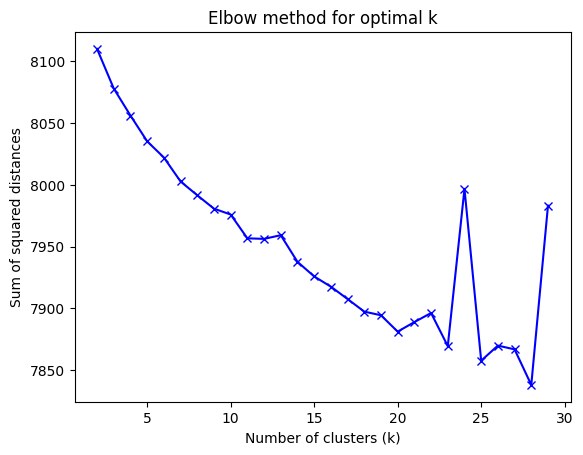

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
kmeans.fit(X_train)

# Silhouette score
silhouette_avg = silhouette_score(X_train, kmeans.labels_)
print("Silhouette score:", silhouette_avg)

# Elbow method
import matplotlib.pyplot as plt

sum_of_squared_distances = []
K = range(2, 30)
for k in K:
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  kmeans.fit(X_train)
  sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal k')
plt.show()
